In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


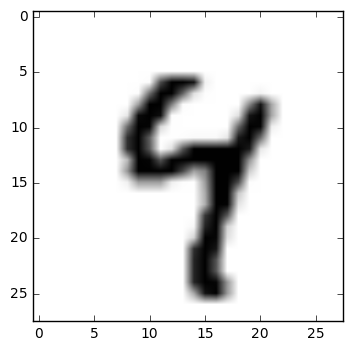

In [3]:
plt.imshow(mnist.train.images[2].reshape(28,28), cmap='Greys')

## Auto Encoder

In [24]:
learning_rate = 0.01
traing_epochs = 20
batch_size = 256
display_step = 1
n_images = mnist.train.num_examples
image_size = 28*28
layer_sizes = [image_size, 128, 16]

In [25]:
#tf.get_variable('test', [layer_sizes[0], layer_sizes[1]], initializer=tf.contrib.layers.xavier_initializer())
#var_names = tf.trainable_variables()
#dir(var_names[0])
# print(tf.trainable_variables())

In [26]:
initializer = tf.contrib.layers.xavier_initializer()

In [27]:
tf.reset_default_graph()

weights = {
    'encoder_W1': tf.get_variable('W1', (layer_sizes[0], layer_sizes[1]), initializer=initializer),
    'encoder_W2': tf.get_variable('W2', (layer_sizes[1], layer_sizes[2]), initializer=initializer),
    'decoder_W3': tf.get_variable('W3', (layer_sizes[2], layer_sizes[1]), initializer=initializer),
    'decoder_W4': tf.get_variable('W4', (layer_sizes[1], layer_sizes[0]), initializer=initializer),
}
biases = {
    'encoder_b1': tf.get_variable('b1', (1, layer_sizes[1])),
    'encoder_b2': tf.get_variable('b2', (1, layer_sizes[2])),
    'decoder_b3': tf.get_variable('b3', (1, layer_sizes[1])),
    'decoder_b4': tf.get_variable('b4', (1, layer_sizes[0])),
}

In [28]:
[var.name for var in tf.trainable_variables()]

['W1:0', 'W2:0', 'W3:0', 'W4:0', 'b1:0', 'b2:0', 'b3:0', 'b4:0']

In [29]:
def encoder(x):
    layer_1 = tf.nn.relu(tf.matmul(x, weights['encoder_W1']) + biases['encoder_b1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['encoder_W2']) + biases['encoder_b2'])
    return layer_2

def decoder(x):
    layer_3 = tf.nn.relu(tf.matmul(x, weights['decoder_W3']) + biases['decoder_b3'])
    layer_4 = tf.nn.sigmoid(tf.matmul(layer_3, weights['decoder_W4']) + biases['decoder_b4'])
    return layer_4

In [30]:
X = tf.placeholder("float", [None, image_size])
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X
cost = tf.reduce_mean(tf.squared_difference(y_true, y_pred))
optimizer = tf.train.AdamOptimizer().minimize(cost)

In [31]:
sess = tf.Session()

sess.run(tf.initialize_all_variables())
n_batch = int(n_images/batch_size)
for epoch in range(traing_epochs):
    for i in range(n_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], {X:batch_x})
    if epoch % display_step == 0:
        print(c)

0.0337836
0.026842
0.0243639
0.0234202
0.0229288
0.0194542
0.019818
0.0200685
0.019998
0.0187111
0.0174528
0.0182095
0.0172849
0.0160191
0.0159648
0.0161878
0.0161391
0.0161016
0.0155906
0.0158808


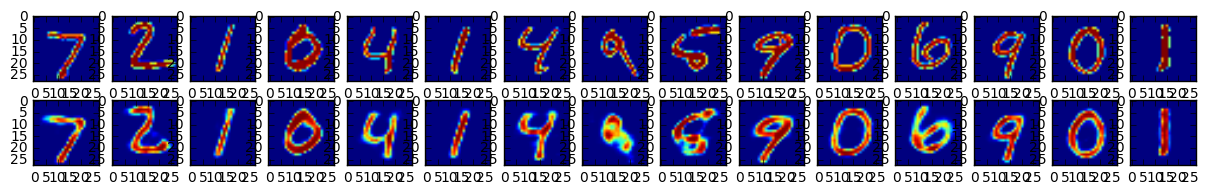

In [32]:
examples_to_show = 15
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))